In [225]:
#Import Libraries
import os
#Data Manipulation and Analysis
import pandas as pd
import numpy as np

#Visualization 
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Clustering and Hierarchical Representation
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

#Preprocessing
from sklearn.preprocessing import StandardScaler

#ML Model and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [226]:
data = pd.read_csv('/kaggle/input/vct-masters-tokyo-dataset4/Valorant Champions Tour 2023 Masters Tokyo dataset.csv') #Make sure to be case specific
print(data.to_string())

          Player               Nationality  Team                       Agents  RND     R    ACS   K:D KAST    ADR   KPR   APR  FKPR  FDPR  HS%  CL%     CL  KMAX    K    D    A  FK  FD  Total Rounds Won  Total Rounds Loss
0          aspas                    Brazil  LOUD                   Jett, Neon   80  1.04  252.0  1.02  69%  159.0  0.83  0.19  0.21  0.20  28%  NaN    0/8    20   66   65   15  17  16                28                 52
1           Less                    Brazil  LOUD               Viper, Killjoy   80  0.91  199.5  0.89  65%  136.7  0.71  0.20  0.04  0.11  23%  13%   2/16    26   57   64   16   3   9                28                 52
2           tuyz                    Brazil  LOUD                         Omen   80  0.91  199.5  0.89  65%  136.7  0.71  0.20  0.04  0.11  23%  13%   2/16    26   57   64   16   3   9                28                 52
3         cauanz                    Brazil  LOUD           Breach, Sova, Skye   80  0.77  170.3  0.72  63%  110.2  0

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             61 non-null     object 
 1   Nationality        61 non-null     object 
 2   Team               61 non-null     object 
 3   Agents             61 non-null     object 
 4   RND                61 non-null     int64  
 5   R                  61 non-null     float64
 6   ACS                61 non-null     float64
 7   K:D                61 non-null     float64
 8   KAST               61 non-null     object 
 9   ADR                61 non-null     float64
 10  KPR                61 non-null     float64
 11  APR                61 non-null     float64
 12  FKPR               61 non-null     float64
 13  FDPR               61 non-null     float64
 14  HS%                61 non-null     object 
 15  CL%                55 non-null     object 
 16  CL                 61 non-nu

# **Dataset Averages by Team**

In [228]:
#Participated Teams

print('Number of teams participated: ', len(data['Team'].unique()))
print('Participated Teams : ', data['Team'].unique())

Number of teams participated:  12
Participated Teams :  ['LOUD' 'ASE' 'NAVI' 'FUT' 'TL' 'T1' 'FNC' 'DRX' 'PRX' 'EDG' 'NRG' 'EG']


In [229]:
data.describe()
data.groupby(['Team']).mean()

/tmp/ipykernel_33/3558253277.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,RND,R,ACS,K:D,ADR,KPR,APR,FKPR,FDPR,KMAX,K,D,A,FK,FD,Total Rounds Won,Total Rounds Loss
Team,,,,,,,,,,,,,,,,,
ASE,101.0,0.920000,195.08,0.856,129.300000,0.666000,0.336000,0.108000,0.094,18.600000,67.600000,79.0,33.800000,10.800000,9.400000,41.000000,60.000000
DRX,192.5,0.968333,197.35,0.930,128.616667,0.671667,0.336667,0.101667,0.125,21.166667,130.666667,137.5,66.833333,17.833333,20.666667,99.166667,107.166667
EDG,341.0,1.054000,208.02,1.092,134.300000,0.746000,0.276000,0.106000,0.096,26.800000,254.600000,232.6,94.200000,36.000000,32.200000,184.000000,157.000000
EG,401.0,1.062000,203.44,1.072,133.420000,0.712000,0.324000,0.106000,0.096,24.800000,286.400000,267.2,129.600000,42.600000,37.600000,232.000000,169.000000
FNC,210.0,1.196000,217.10,1.304,136.960000,0.758000,0.352000,0.110000,0.090,23.200000,159.400000,124.0,74.200000,23.200000,18.800000,127.000000,83.000000
FUT,162.0,0.974000,194.74,0.970,126.060000,0.692000,0.322000,0.102000,0.096,21.800000,111.800000,115.4,52.200000,16.600000,15.800000,76.000000,86.000000
LOUD,80.0,0.854000,190.26,0.802,126.140000,0.650000,0.250000,0.086000,0.126,19.400000,52.000000,65.0,20.000000,6.800000,10.000000,28.000000,52.000000
NAVI,124.0,0.996000,194.16,0.970,131.980000,0.684000,0.274000,0.110000,0.090,24.000000,85.000000,88.6,33.800000,13.800000,11.000000,55.000000,69.000000
NRG,351.0,1.034000,195.90,1.030,130.720000,0.686000,0.330000,0.092000,0.106,22.200000,241.000000,234.6,115.400000,32.800000,37.400000,186.000000,165.000000


# **Agent Analysis**

In [230]:
# Analyze the most played agent
# Split the Agents column and count each agent's occurrence
all_agents = data['Agents'].str.split(', ').explode()
most_played_agent = all_agents.value_counts().idxmax()
print(f"The most played agent is: {most_played_agent}")

The most played agent is: Viper


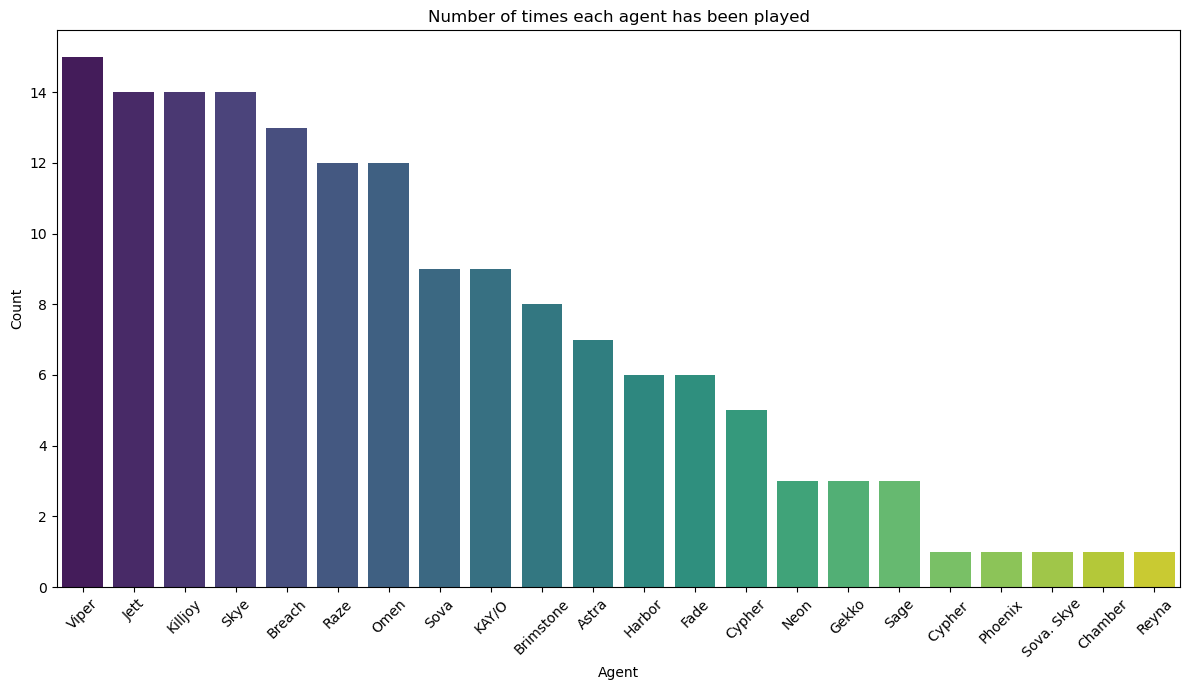

In [249]:
#Split the Agents column
data['Agents_list'] = data['Agents'].str.split(', ')

#Explode the Agents_list column
exploded_agents = data.explode('Agents_list')

#Remove +1, +2, etc. and split the entries that still have combined agents
exploded_agents = exploded_agents[~exploded_agents['Agents_list'].str.contains("\+\d", regex=True)]
exploded_agents['Agents_list'] = exploded_agents['Agents_list'].str.split(', ')
exploded_agents = exploded_agents.explode('Agents_list')

#Count the frequency of each agent
agent_counts = exploded_agents['Agents_list'].value_counts()

#Visualization
plt.figure(figsize=(12, 7))
sns.barplot(x=agent_counts.index, y=agent_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel('Agent')
plt.ylabel('Count')
plt.title('Number of times each agent has been played')
plt.tight_layout()
plt.show()


# **Player Nationalities**

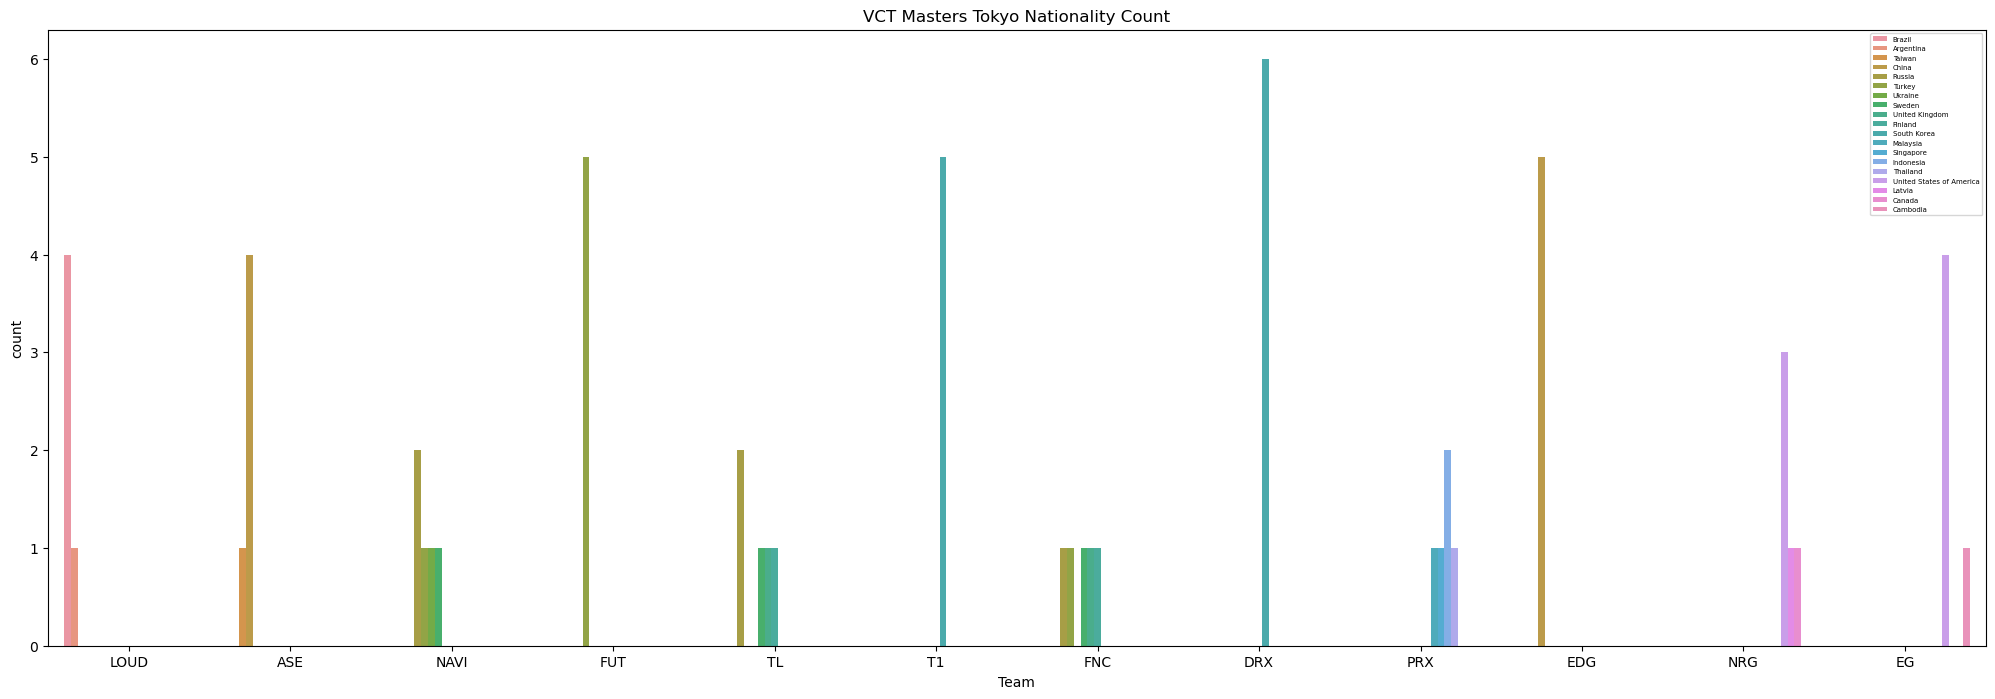

In [231]:
plt.figure(figsize=(25,8))
plt.title("VCT Masters Tokyo Nationality Count",fontsize=12)
sns.countplot(data, x = "Team", hue = "Nationality")
plt.legend(fontsize = 5, loc='upper right')
plt.show()

This plot just goes to show that South Korea has a major global prescence in the esports scene.

# **Highest and Lowest Kill:Death Ratio (K:D)**

In [232]:
# Top players based on ADR
top_adr_players = data.sort_values(by='ADR', ascending=False).head(5)
print("Top 5 players based on ADR:\n", top_adr_players[['Player', 'ADR']])

Top 5 players based on ADR:
     Player    ADR
46  ZmjjKK  169.7
42  Jinggg  166.5
0    aspas  159.0
20    Sayf  158.0
33   Derke  157.7


In [233]:
# Player with highest clutch percentage (assuming the CL% column contains this information)
data['CL%'] = data['CL%'].str.rstrip('%').astype('float') / 100.0  # Convert percentage string to float
highest_clutch_player = data.sort_values(by='CL%', ascending=False).iloc[0]
print(f"Player with highest clutch percentage is: {highest_clutch_player['Player']} with {highest_clutch_player['CL%']*100}%")


Player with highest clutch percentage is: Derke with 38.0%


# **Headshot Percentages Above 30%**

In [234]:
data.loc[data['HS%']>'30%']

,Player,Nationality,Team,Agents,RND,R,ACS,K:D,KAST,ADR,...,CL%,CL,KMAX,K,D,A,FK,FD,Total Rounds Won,Total Rounds Loss
10,SUYGETSU,Russia,NAVI,"Cypher, Viper, Killjoy",124,1.10,205.8,1.17,72%,144.8,...,0.21,3/14,23,91,78,28,6,12,55,69
11,Shao,Russia,NAVI,"Fade, Killjoy, Astra, +1",124,1.05,190.6,1.15,73%,137.4,...,0.07,2/27,34,90,78,27,8,10,55,69
14,Zyppan,Sweden,NAVI,"KAY/O, Fade, Skye",124,0.89,163.6,0.80,70%,111.8,...,0.09,1/11,19,73,91,40,13,6,55,69
18,qRaxs,Turkey,FUT,"KAY/O, Gekko",162,0.94,206.8,0.90,77%,135.4,...,0.06,1/17,21,111,124,71,14,12,76,86
22,soulcas,United Kingdom,TL,"Skye, Sage, Fade, +2",169,0.94,176.8,0.94,73%,117.9,...,0.09,2/23,18,109,116,49,7,13,75,94
24,Redgar,Russia,TL,Omen,169,0.78,136.1,0.69,69%,87.5,...,0.11,2/18,16,82,118,70,13,21,75,94
47,Smoggy,China,EDG,"Breach, Killjoy, Jett, +1",341,1.07,195.3,1.13,77%,130.3,...,0.19,9/47,31,251,222,92,27,23,184,157
57,Demon1,United States of America,EG,"Jett, Brimstone, Chamber",401,1.09,210.9,1.19,73%,143.2,...,0.21,11/53,28,318,267,69,56,39,232,169


In this table, we see that SUYGETSU, Shao, Zyppan, qRaxs, soulcas, Redgar, Smoggy, and Demon1 are the only people to have a Headshot Percentage above 30%.

# Quantitative Look at Player Performance Metrics

In [235]:
def create_scatter_plot(data, x_cols, y_cols, title, x_labels, y_labels):
    assert len(x_cols) == len(y_cols) == len(x_labels) == len(y_labels), "All lists should have the same length."
    
    n_cols = len(x_cols)
    fig = make_subplots(rows=1, cols=n_cols)
    
    for i in range(n_cols):
        add_scatter_trace_with_hover(fig, data, x_cols[i], y_cols[i], x_labels[i], 1, i+1)
        fig.update_xaxes(title_text=x_labels[i], row=1, col=i+1)
        fig.update_yaxes(title_text=y_labels[i], row=1, col=i+1)

    fig.update_layout(title=title)
    fig.show()


    
def add_scatter_trace_with_hover(fig, data, x_col, y_col, name, row, col):
    fig.add_trace(
        go.Scatter(
            x=data[x_col], 
            y=data[y_col], 
            name=name, 
            mode='markers',
            text=data['Player'],  # display player names on hover
            hoverinfo='text+x+y'  # show hover info with player names and x,y values
        ),
        row=row, 
        col=col
    )

In [236]:
# This scatter plot focuses on how different player metrics (Kills, Deaths, Headshot Percentage) relate to 
# the Kill/Assist/Trade/Survival Percentage (KAST). This provides insights into which factors might have the 
# most impact on a player's overall KAST score.
create_scatter_plot(data,
                    ['K', 'D', 'HS%'],
                    ['KAST', 'KAST', 'KAST'],
                    'Relationship between Kill/Assist/Trade/Survival Percentage (KAST), Kill, Death and Headshot percentage',
                    ['Kills', 'Death', 'Headshot Percentage'],
                    ['KAST', 'KAST', 'KAST'])

In [237]:
# This scatter plot analyzes the relationships between various player performance metrics (Headshot Percentage, FKPR, KAST)
# and the total rounds a team has won. It helps to understand which metrics might have a strong correlation with 
# a team's success in terms of rounds won.
create_scatter_plot(data, 
                    ['HS%', 'FKPR', 'KAST'], 
                    ['Total Rounds Won', 'Total Rounds Won', 'Total Rounds Won'], 
                    'Various Relationships to Total Rounds Won', 
                    ['Headshot Percentage', 'First Kills Per Round (FKPR)', 'Kill/Assist/Trade/Survival Percentage (KAST)'], 
                    ['Total Rounds Won', 'Total Rounds Won', 'Total Rounds Won'])

# Heatmap Correlation Analysis 

/tmp/ipykernel_33/1479152994.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



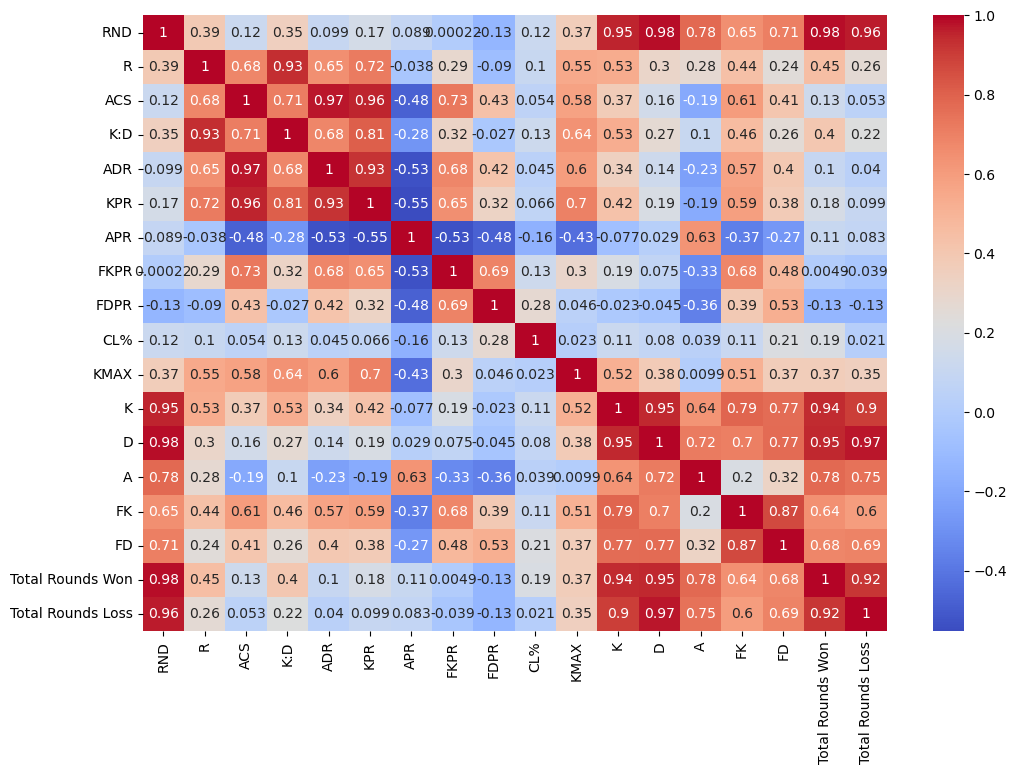

In [238]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


# **Rounds Won and Lost by Teams**


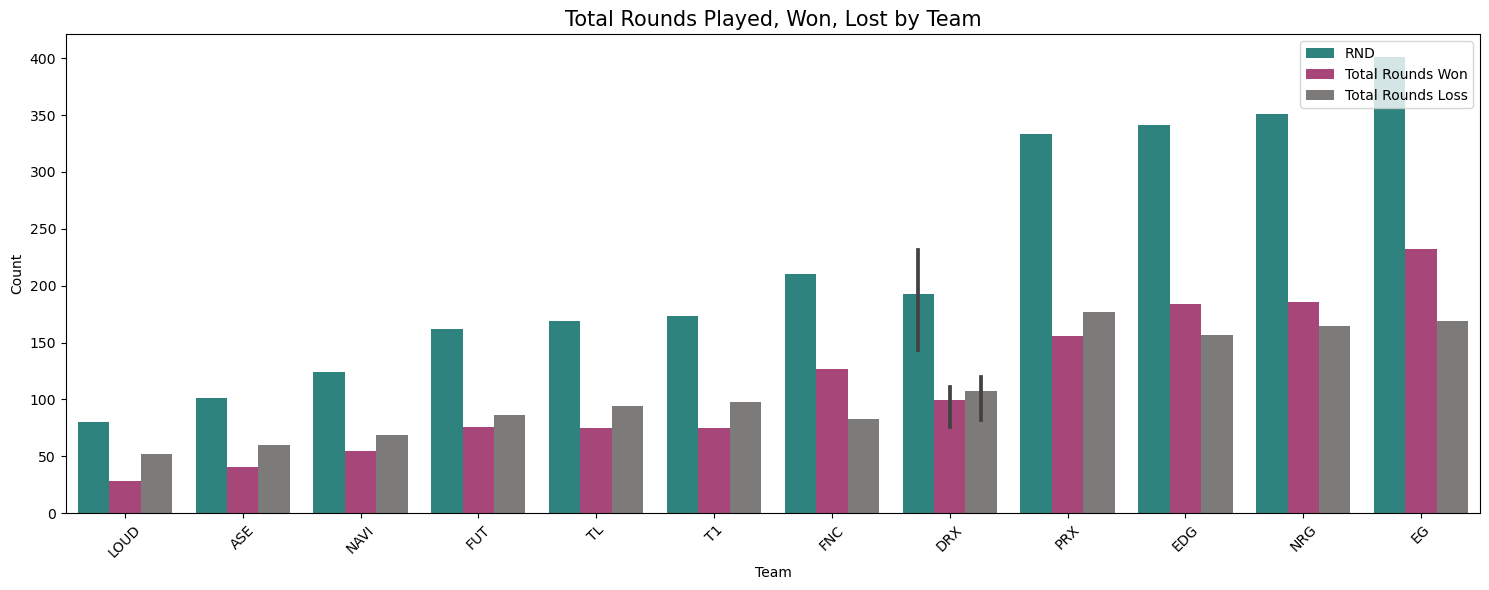

In [239]:
# Get a color from each colormap
viridis_color = cm.viridis(0.5)  # 0.5 is the midpoint
magma_color = cm.magma(0.5)
cividis_color = cm.cividis(0.5)

# Use in seaborn plot
plt.figure(figsize=(15, 6))
plt.title("Total Rounds Played, Won, Lost by Team", fontsize=15)

long_data = pd.melt(data, id_vars=['Team'], value_vars=['RND', 'Total Rounds Won', 'Total Rounds Loss'],
                    var_name='Round_Type', value_name='Count')

sns.barplot(x='Team', y='Count', hue='Round_Type', data=long_data, palette=[viridis_color, magma_color, cividis_color])

plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Top 10 Players

In [240]:
sort_KAST = data.sort_values('KAST', ascending=False).head(10)
display(sort_KAST[['Player', 'Team', 'KAST', 'K', 'D']])  # Display the top 10 players with selected columns

,Player,Team,KAST,K,D
30,Alfajer,FNC,80%,184,113
31,Leo,FNC,80%,150,102
49,Haodong,EDG,80%,228,232
34,Boaster,FNC,78%,116,127
56,Ethan,EG,78%,262,246
18,qRaxs,FUT,77%,111,124
47,Smoggy,EDG,77%,251,222
48,CHICHOO,EDG,77%,232,213
32,Chronicle,FNC,76%,174,131
41,d4v41,PRX,76%,222,223


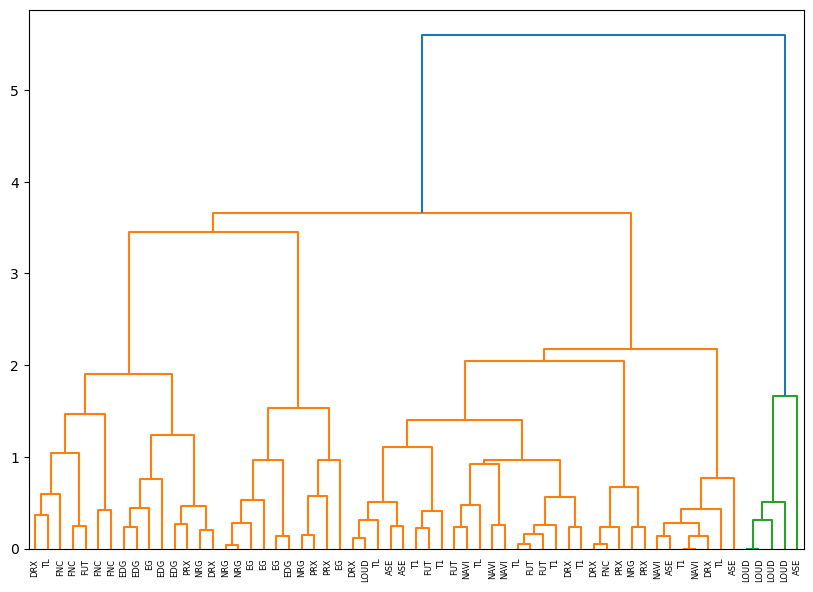

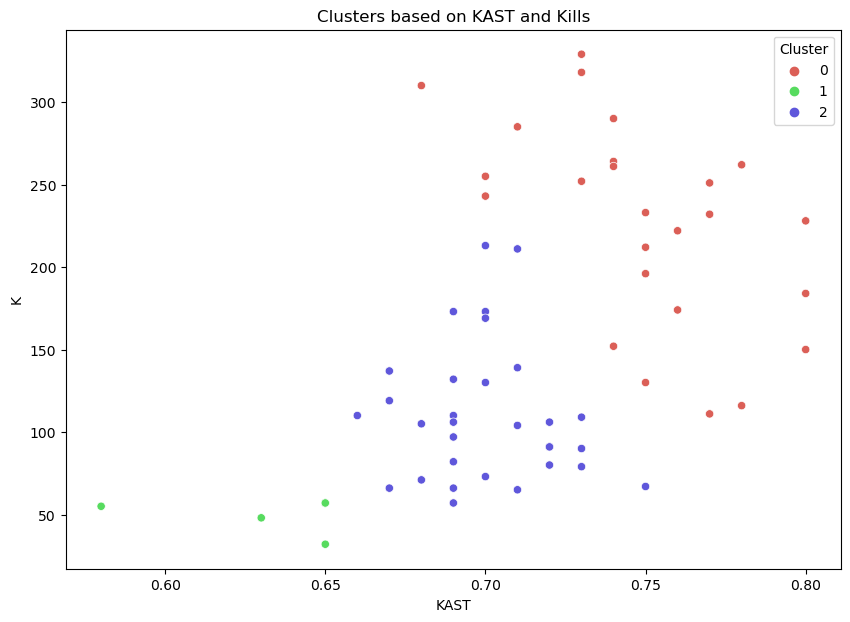

In [241]:
#Had an error message with KAST column because of floats and non-string types, so check if KAST is a string object to convert to float.
if data['KAST'].dtype == 'object':
    data['KAST'] = data['KAST'].str.rstrip('%').astype('float') / 100.0

#Normalize the data so that all features have a mean of 0 and standard deviation of 1.
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(data[['KAST', 'K']]) 
#Use from SciPy hiearchy module to perform hierarchical clustering on the scaled data to prepare for a dendrogram.
linked = linkage(data_scaled, method='complete')

#Display
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=data['Team'].values, distance_sort='descending')
plt.show()


cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
#Fits the algorithm to the scaled data and predicts cluster labels
data['Cluster'] = cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='KAST', y='K', hue='Cluster', palette=sns.color_palette("hls", 3))
plt.title("Clusters based on KAST and Kills")
plt.show()


# **Logistic Regression**

Linear Regression is for regression tasks, which predict a continuous numeric value and models the relationship between the independent and dependent variables by fitting a linear equation to the data. In this example, it is used to predict player performance metrics such as ADR (Average Damage Per Round) and KAST (Kills, Assists, Survived, and Traded Percentage) based on other features like Kills and Deaths.  

In [242]:
#Function to visualize the printed algorithms
def visualize_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    
    categories = list(report.keys())[0:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
    precision = [report[cat]['precision'] for cat in categories]
    recall = [report[cat]['recall'] for cat in categories]
    f1_score = [report[cat]['f1-score'] for cat in categories]
    
    x = list(range(len(categories)))
    bar_width = 0.25
    
    plt.figure(figsize=(10, 6))
    plt.bar([i-bar_width for i in x], precision, width=bar_width, label='Precision', color='b', align='center')
    plt.bar(x, recall, width=bar_width, label='Recall', color='r', align='center')
    plt.bar([i+bar_width for i in x], f1_score, width=bar_width, label='F1 Score', color='g', align='center')
    
    plt.xlabel('Classes')
    plt.ylabel('Scores')
    plt.title(f'Classification Report for {model_name}')
    plt.xticks(x, categories)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

    
def visualize_feature_importances(importances_df):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importances_df, x='Importance', y='Feature', palette='viridis')
    plt.title('Feature Importances from Random Forest')
    plt.tight_layout()
    plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.57      0.73         7

    accuracy                           0.77        13
   macro avg       0.83      0.79      0.76        13
weighted avg       0.85      0.77      0.76        13



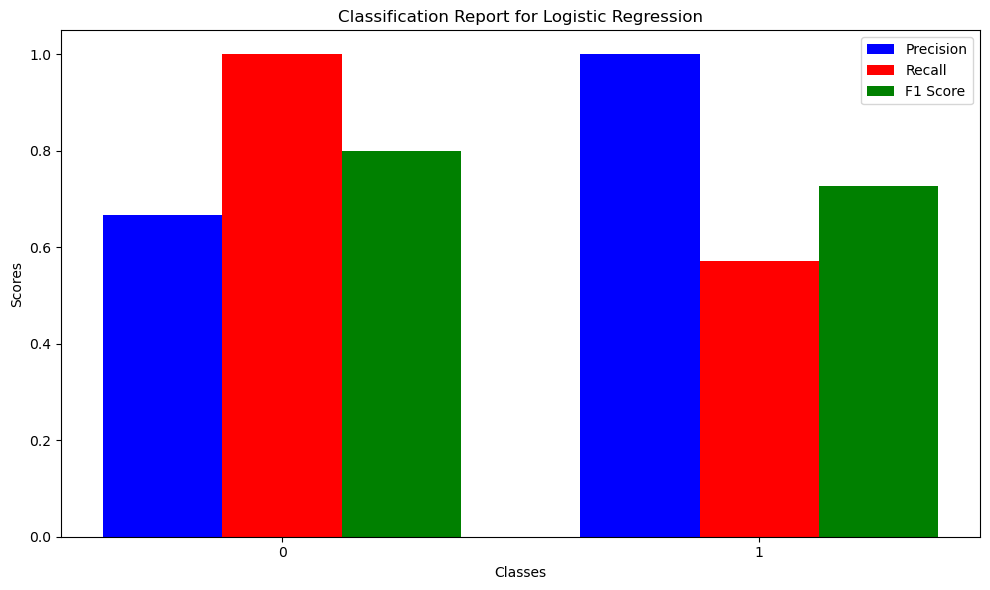

In [243]:
#Data Preparation
#Create a Win Column by comparing Rounds Won and Lost and then convert it into binary
data['Win'] = data['Total Rounds Won'] > data['Total Rounds Loss'] 
data['Win'] = data['Win'].astype(int)

#Based on the past analysis I did earlier, I decided to choose KPR, ADR, and KAST 
#Because they might have more impact to the prediction of a match outcome
selected_features = ['KPR', 'ADR', 'KAST']

X = data[selected_features]
y = data['Win']

#Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train-Test Split
#Train model on one subset of the data 
#And then evaluate its performance on another subset that the model hasn't seen before.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Selection and Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluation
y_predict = model.predict(X_test)
report = classification_report(y_test, y_predict)
print("Classification Report:\n", report)

visualize_classification_report(y_test, y_predict, "Logistic Regression")

The precision tells you how many of the predicted wins were actually wins. Recall is the ratio of correctly predicted positive observations to the total actual positives, so it tells us how many of the actual wins were predicted correctly. F1 Score is the weighted average of precision and recall, so it considers the false positive and negatives. Higher F1-Score show that a better trade-off between correctly identifying precision and recalls. Support is the number of occurrences of the class in the specified dataset. In our case, it tells us the instances of actual wins or loss, depending on the class.
 
Accuracy is the ratio of the correctly predicted observations to the total observations. Macro Avg and Weighted Avg are the average scores calculated considering the differences in the class support. Macro Avg calculates unweighted averahes while Weighted Avg accounts for class imbalances.

Class 0 (Loss): 
* Precision: 67%
* Recall: 100%
* F1 Score: 80%
* Support: 6, which means 6 instances of actual losses in the test set.


Class 1(Win):
* Precision: 100%
* Recall: 57%, model correctly identified 57% out of all the actual wins.
* F1-Score: 73%
* Support: 7 actual wins in the test set

Overall:
* Accuracy: 77%
* Macro Avg: Precision: 83%, Recall: 79%, F1 Score: 76%
* Weighted Avg: Precision: 85%, Recall: 77%, F1 Score: 76%

# **Decision Tree**

Decision Tree is an algorithm for both classifiction and regression tasks. Since it's a tree, each node represents a feature, each branch is a decision rule, and each leaf node is a predicted outcome. 

In this example, we use a Decision Tree to predict whether a team will win or lose based on player performance metrics such as KPR (Kills Per Round), ADR, and KAST. So, it will recursively split the data into subsets and make decisions based on the relationships it learned from the training data. For example, a Decision Tree could learn that if a team's KPR is above a certain threshold and ADR is below another threshold, the team is more likely to win, so the model would create a set of rules to classify the teams into win or loss categories based on those thresholds in the data.

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.83      0.67         6
           1       0.75      0.43      0.55         7

    accuracy                           0.62        13
   macro avg       0.65      0.63      0.61        13
weighted avg       0.66      0.62      0.60        13



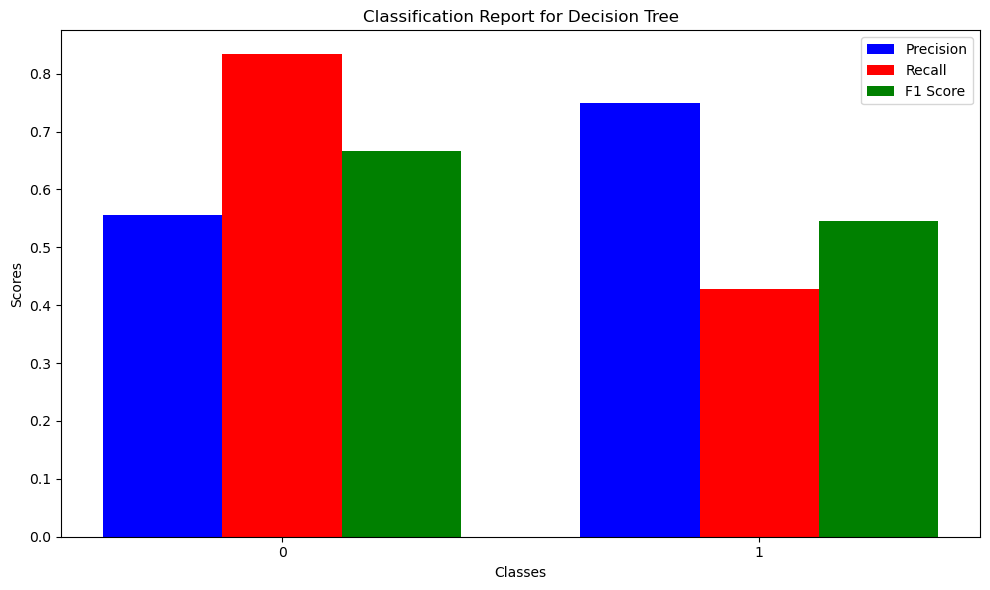

In [244]:
#Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

#Fit the model to the training data
#Trains on the X_train and Y_train data to 
#Learn how to make predictions
dt_classifier.fit(X_train, y_train)

#Predict on the test data
y_pred_dt = dt_classifier.predict(X_test)

#Evaluate
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

visualize_classification_report(y_test, y_pred_dt, "Decision Tree")

Class 0 (Loss):
* Precision: 56%
* Recall: 83%
* F1-Score: 67%
* Support: 6 instances

Class 1(Win):
* Precision: 75%
* Recall: 43%
* F1-Score: 55%
* Support: 7 instances


Overall:

* Accuracy: 62%
* Macro Avg: Precision: 65%, Recall: 63%, F1 Score: 61%
* Weighted Avg: Precision: 66%, Recall: 62%, F1 Score: 60%

# **Naive Bayes Classifier**

Naive Bayes is a probability Machine Learning algorithm for classification tasks based on conditional probability in the Bayes' Theorum. It assumes that features are conditionally independent given the class. 


In this case, it can predict whether a team will win or not based on the given player performance features. It assumes that the features are conditionally independent given the class: win or not win. Therefore, it assumes that the performance of one player does not affect the performance of another player in determining the outcome of the match. 

Furthermore, we use the Gaussian Naive Bayes classifier to the data, so it learns that the patterns in the player performances associated with winning and not winning. It then uses the learned patterns to predict whether a team will win or not based on the performance metrics.

I did this algorithm to test the data out and learn for myself, but this algorithm might be better when there are more indpendent assumptions. However, the interactions between the player performances might have an impact on algorithm outcomes.

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.83      0.62         6
           1       0.67      0.29      0.40         7

    accuracy                           0.54        13
   macro avg       0.58      0.56      0.51        13
weighted avg       0.59      0.54      0.50        13



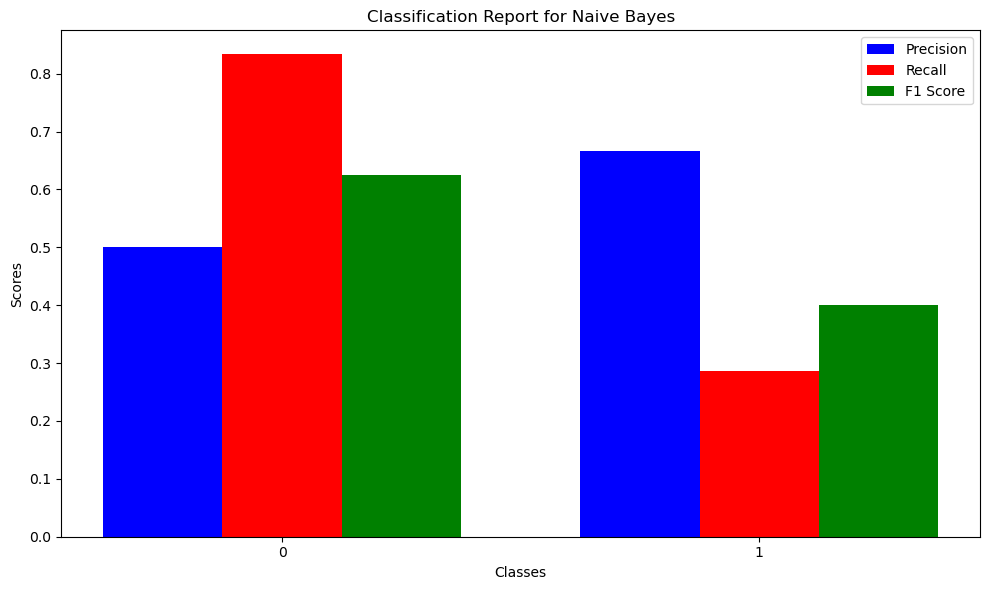

In [245]:
# plit to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

#Fit the model to the training data
nb_classifier.fit(X_train, y_train)

#Predict on test data
y_pred_nb = nb_classifier.predict(X_test)

#Evaluate
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

visualize_classification_report(y_test, y_pred_nb, "Naive Bayes")

Class 0 (Loss):
* Precision: 50%
* Recall: 83%
* F1-Score: 62%
* Support: 6 instances


Class 1(Win):
* Precision: 67%
* Recall: 29%
* F1-Score: 40%
* Support: 7 instances

Overall:

* Accuracy: 54%
* Macro Avg: Precision: 58%, Recall: 56%, F1 Score: 51%
* Weighted Avg: Precision: 59%, Recall: 54%, F1 Score: 50%

# **Random Forest Classifier**

Random Forest Classifier is when it combines the decision trees to make predicitons for both classification and regression. It makes a "forest" of decision trees where each are trained on a random subset of data, using random subsets of features. The final prediction is made by grouping the predictions of the individual trees through voting (classification) or averaging (regression).

In this example, we use the Random Forest Classifier to predict whether a team will win or not based on the given features such as KPR, ADR, and KAST. It's powerful because it can ignore irrelevant features. 

There is downside to using this algorithm because it's a lot better by using a larger dataset, but my dataset only consists of 61 total players. Therefore, it has a risk of overfitting, where the model learns to memorize the training data rather than the patterns that would show in a larger dataset.

In [246]:
#Create a RandomForestClassifier to compute feature importances
#Creates 100 decision trees and random_state of reproducibility
clf = RandomForestClassifier(n_estimators=100, random_state=42)

#Fit the random forest classifier to the training data
#X_train features and y_train target to train the ensemble of decision trees.
clf.fit(X_train, y_train)

#Get feature importances
#Holds an array of important values where each has a feature
feature_importances = clf.feature_importances_

#Create a DataFrame to show feature importances
#Two columns: Feature and Importance
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df)


  Feature  Importance
2    KAST    0.383215
1     ADR    0.348748
0     KPR    0.268038


KAST feature has the highest importance value of ~0.383, ADR has importance value of ~0.349, and KPR has importance value of ~0.268. This goes to show that KAST, ADR, and KPR have the most influential features in predicting the target variable, and this is in the order of importance, too. 

Since KAST is such a strong indicator of a team's success, it goes to show that a team with higher KAST overall might have a better chance of winning. You can apply this with ADR because of higher ADR could indicate more effective and impactful gameplay, which can be taking meaningful gunfights and using effective, synergized abilities/ultimates. KPR is a little different because of course Kill Per Round is important, but it has a small influence compared to KAST and ADR.

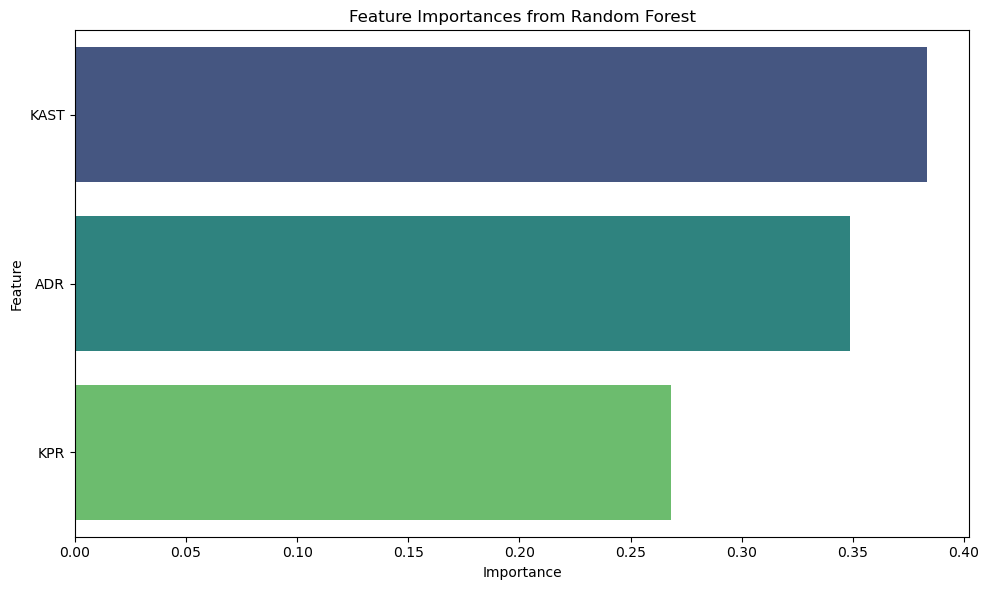

In [247]:
# Plotting the feature importances
visualize_feature_importances(importances_df)

****